# Nueva sección

In [143]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import (
    LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet,
    BayesianRidge, PassiveAggressiveRegressor
)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,
    RandomForestRegressor, GradientBoostingRegressor
)
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error,
    accuracy_score, log_loss, confusion_matrix, classification_report,
    mean_absolute_error, explained_variance_score
)
import xgboost as xgb
from tqdm.auto import tqdm
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, label_binarize, LabelEncoder
plt.rcParams['figure.figsize']=[10,5]
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import plotly.graph_objects as go
from sklearn.feature_selection import RFE
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV



from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Steel_industry_data.csv");

# Load columns

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [144]:

# Shape dataset
# We check here ho many rows has the dataset

df.shape



(35040, 11)

In [145]:
# Colum names array

df.columns


Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [146]:
# Check data types

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [147]:
# Check null values

df.isnull().sum()


date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [148]:
# Check number of unique values

df.nunique()


date                                    35040
Usage_kWh                                3343
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      768
CO2(tCO2)                                   8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_of_week                                 7
Load_Type                                   3
dtype: int64

In [149]:

# Data Transformation:
# Encode Categorical Columns
categ = df.select_dtypes(include = "object").columns

columns_to_convert = ['NSM']
df[columns_to_convert] = df[columns_to_convert].astype(float)

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)
#count the value for load type after LabelEncoder
df["Load_Type"].value_counts()



Load_Type
0    18072
2     9696
1     7272
Name: count, dtype: int64

In [150]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900.0,0,1,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,0,1,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,0,1,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,0,1,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500.0,0,1,0


In [151]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  int64  
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  float64
 8   WeekStatus                            35040 non-null  int64  
 9   Day_of_week                           35040 non-null  int64  
 10  Load_Type                             35040 non-null  int64  
dtypes: float64(7), 

In [152]:
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  float64
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 2.7 MB


In [153]:
# Data Augmentation
# Apply random noise
noisy_df = df.apply(lambda x: x + np.random.normal(0, 0.01, len(x)) if x.dtype == 'float' else x)

# Duplicate and shuffle
duplicated_df = pd.concat([df] * 2, ignore_index=True)
shuffled_df = shuffle(duplicated_df)

# Apply SMOTE
X = df.drop('Load_Type', axis=1)
y = df['Load_Type']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled['Load_Type'] = y_resampled
df_aug = X_resampled
df_aug.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900.0,0,1,0
1,4.00,4.46,0.0,0.0,66.77,100.0,1800.0,0,1,0
2,3.24,3.28,0.0,0.0,70.28,100.0,2700.0,0,1,0
3,3.31,3.56,0.0,0.0,68.09,100.0,3600.0,0,1,0
4,3.82,4.50,0.0,0.0,64.72,100.0,4500.0,0,1,0


In [154]:
df_aug.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54216 entries, 0 to 54215
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             54216 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  54216 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  54216 non-null  float64
 3   CO2(tCO2)                             54216 non-null  float64
 4   Lagging_Current_Power_Factor          54216 non-null  float64
 5   Leading_Current_Power_Factor          54216 non-null  float64
 6   NSM                                   54216 non-null  float64
 7   WeekStatus                            54216 non-null  int64  
 8   Day_of_week                           54216 non-null  int64  
 9   Load_Type                             54216 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 4.1 MB


In [155]:
#count the value for load type after data augmentstion
df_aug["Load_Type"].value_counts()

Load_Type
0    18072
2    18072
1    18072
Name: count, dtype: int64

In [156]:
# Count the occurrences of each load type
load_type_counts = df_aug['Load_Type'].value_counts()

labals_lis = ['Light Load',
              'Medium Load',
              'Maximum Load' ]

# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=labals_lis, values=load_type_counts.values)])
fig.update_layout(title='Distribution of Load Types after Augmentation')
fig.show()

In [157]:
def feature_selection_using_RF(x,y):
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to select
    rfe.fit(x, y)

    selected_features = x.columns[rfe.support_]
    importances = np.max(rfe.ranking_) + 1 - rfe.ranking_
    fig = px.bar(x=x.columns, y=importances, labels={'x': 'Feature', 'y': 'Importance'},
                     title='Feature Importances')
    fig.show()
    x = x[selected_features]
    return x,y
x = df.drop(['Load_Type'], axis=1)
y = df.Load_Type
xg = df_aug.drop(['Load_Type'], axis=1)
yg = df_aug.Load_Type
x , y = feature_selection_using_RF(x,y)


In [158]:
xg , yg = feature_selection_using_RF(xg,yg)


In [159]:
# Split the dataset and prepare some lists to store the models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
xg_train, xg_test, yg_train, yg_test = train_test_split(xg, yg, test_size=0.25, random_state = 42)

In [160]:
#Loop for the training model
names = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
    "Random Forest with Extra Trees",
    "AdaBoost",
    "XGBoost"
]

clf = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(n_estimators=200, max_leaf_nodes=16),
    ExtraTreesClassifier(),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3)),
    xgb.XGBClassifier()
]

In [161]:
def train_clf(x_train, y_train,x_test, y_test):
    scores = []
    for model in tqdm(clf):
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        scores.append(score)
#         print(model)
#         print(score)
    return pd.DataFrame(zip(names,scores), columns=['Classifier', 'Accuracy'])

In [162]:
#List the classifier and their accuracy
scores_df = train_clf(x_train, y_train,x_test, y_test)
scores_df = scores_df.sort_values(by=['Accuracy'], ascending=[False])
print(scores_df)

# Plot the accuracies using Plotly Express
fig = px.bar(scores_df, x='Classifier', y='Accuracy', labels={'Classifier': 'Classifier', 'Accuracy': 'Accuracy'},
             title='Classifier Accuracies')
fig.update_layout(xaxis_title='Classifier', yaxis_title='Accuracy')
fig.show()

  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                       Classifier  Accuracy
7                         XGBoost  0.894635
5  Random Forest with Extra Trees  0.889155
1                             KNN  0.869292
4                   Random Forest  0.863927
2                   Decision Tree  0.857648
6                        AdaBoost  0.812557
3                     Naive Bayes  0.704338
0             Logistic Regression  0.703425


In [163]:
#List the classifier and their accuracy
scores_df_aug = train_clf(xg_train, yg_train,xg_test, yg_test)
scores_df_aug = scores_df_aug.sort_values(by=['Accuracy'], ascending=[False])
print(scores_df)

# Plot the accuracies using Plotly Express
fig = px.bar(scores_df_aug, x='Classifier', y='Accuracy', labels={'Classifier': 'Classifier', 'Accuracy': 'Accuracy'},
             title='Classifier Accuracies')
fig.update_layout(xaxis_title='Classifier', yaxis_title='Accuracy')
fig.show()

  0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



                       Classifier  Accuracy
7                         XGBoost  0.894635
5  Random Forest with Extra Trees  0.889155
1                             KNN  0.869292
4                   Random Forest  0.863927
2                   Decision Tree  0.857648
6                        AdaBoost  0.812557
3                     Naive Bayes  0.704338
0             Logistic Regression  0.703425


In [164]:

# Plot the accuracies using Plotly Express
fig = px.bar(scores_df, x='Classifier', y='Accuracy', labels={'Classifier': 'Classifier', 'Accuracy': 'Accuracy'},
             title='Classifier Accuracies')
fig.update_layout(xaxis_title='Classifier', yaxis_title='Accuracy')
fig.show()

In [165]:
#Naive grid search implementation
parameters = {'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]}
CBC = xgb.XGBClassifier()
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(xg_train, yg_train)

print("Results from Grid Search" )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

Results from Grid Search

 The best estimator across ALL searched params:
 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

 The best score across ALL searched params:
 0.8945944616595347

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 9, 'n_estim

In [166]:
#This is the classification model with the best parameters
Grid_CBC


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)})

In [167]:
# Make predictions on the test set
yg_pred = Grid_CBC.predict(xg_test)

In [168]:
# Calculate evaluation metrics
def cls_report(y_test, y_pred):
    y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
    n_classes = y_test_binarized.shape[1]
    y_pred_reshaped = y_pred.reshape(-1, 1)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test_binarized, y_pred_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return class_report, conf_matrix, roc_auc, mse, r2

In [169]:
class_report, conf_matrix, roc_auc, mse, r2 = cls_report(yg_test, yg_pred)


In [170]:
# Print the results
print(f"AUC-ROC: {roc_auc:.4f}")
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print("\nClassification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

# Create a DataFrame for the confusion matrix
classes = ['Light Load','Maximum Load' ,  ' Medium Load']
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plot the confusion matrix heatmap using Plotly Express
fig = px.imshow(df_cm,
                labels=dict(x="Predicted Label", y="True Label", color="Count"),
                x=classes,
                y=classes,
                color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(title='Confusion Matrix',
                  xaxis_title='Predicted Label',
                  yaxis_title='True Label')

# Show the plot
fig.show()

AUC-ROC: 0.0391
Mean Squared Error: 0.15751807584476907
R-squared: 0.7644444281643089

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4565
           1       0.85      0.92      0.89      4490
           2       0.88      0.83      0.85      4499

    accuracy                           0.90     13554
   macro avg       0.90      0.90      0.90     13554
weighted avg       0.90      0.90      0.90     13554

Confusion Matrix:
[[4347   35  183]
 [  28 4135  327]
 [  83  681 3735]]


In [171]:
# Now we try regression models

def feature_selection_using_RFR(x,y):
    model = RandomForestRegressor()
    rfe = RFE(model, n_features_to_select=5)  # Choose the number of features to select
    rfe.fit(x, y)

    selected_features = x.columns[rfe.support_]
    importances = np.max(rfe.ranking_) + 1 - rfe.ranking_
    fig = px.bar(x=x.columns, y=importances, labels={'x': 'Feature', 'y': 'Importance'},
                     title='Feature Importances')
    fig.show()
    x = x[selected_features]
    return x,y
# Split the dataset and prepare some lists to store the models
x = df.drop(['Usage_kWh'], axis=1)
y = df.Usage_kWh
# Split the dataset and prepare some lists to store the models
xg = df_aug.drop(['Usage_kWh'], axis=1)
yg = df_aug.Usage_kWh
x , y = feature_selection_using_RFR(x,y)


In [172]:
xg , yg = feature_selection_using_RFR(xg,yg)


In [173]:
# Split the dataset and prepare some lists to store the models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
xg_train, xg_test, yg_train, yg_test = train_test_split(xg, yg, test_size=0.25, random_state = 42)


In [174]:
#Loop for the training model
names = [
    "Linear Regression",
    "Ridge Regression",
    "KNN Regression",
    "Bayesian Ridge Regression"
]

reg = [
    LinearRegression(),
    Ridge(alpha=0.5),
    KNeighborsRegressor(n_neighbors=35,leaf_size=50),
    BayesianRidge()
]
def train_reg(x_train, y_train,x_test, y_test):
    scores = []
    for model in tqdm(reg):
        model.fit(x_train, y_train)
        score = model.score(x_test, y_test)
        scores.append(score)
#         print(model)
#         print(score)
    return pd.DataFrame(zip(names,scores), columns=['Regressor', 'Accuracy'])
#List the Regressor and their accuracy
scores_df = train_reg(x_train, y_train,x_test, y_test)
scores_df = scores_df.sort_values(by=['Accuracy'], ascending=[False])
print(scores_df)

# Plot the accuracies using Plotly Express
fig = px.bar(scores_df, x='Regressor', y='Accuracy', labels={'Regressor': 'Regressor', 'Accuracy': 'Accuracy'},
             title='Regression Model Accuracies')
fig.update_layout(xaxis_title='Regressor', yaxis_title='Accuracy')
fig.show()


  0%|          | 0/4 [00:00<?, ?it/s]

                   Regressor  Accuracy
0          Linear Regression  0.984465
3  Bayesian Ridge Regression  0.984465
1           Ridge Regression  0.969127
2             KNN Regression  0.935652


In [175]:
#List the Regressor and their accuracy
scores_df_aug = train_reg(xg_train, yg_train,xg_test, yg_test)
scores_df_aug = scores_df_aug.sort_values(by=['Accuracy'], ascending=[False])
print(scores_df_aug)

# Plot the accuracies using Plotly Express
fig = px.bar(scores_df_aug, x='Regressor', y='Accuracy', labels={'Regressor': 'Regressor', 'Accuracy': 'Accuracy'},
             title='Regression Model Accuracies')
fig.update_layout(xaxis_title='Regressor', yaxis_title='Accuracy')
fig.show()

  0%|          | 0/4 [00:00<?, ?it/s]

                   Regressor  Accuracy
0          Linear Regression  0.981147
3  Bayesian Ridge Regression  0.981147
1           Ridge Regression  0.974453
2             KNN Regression  0.964948


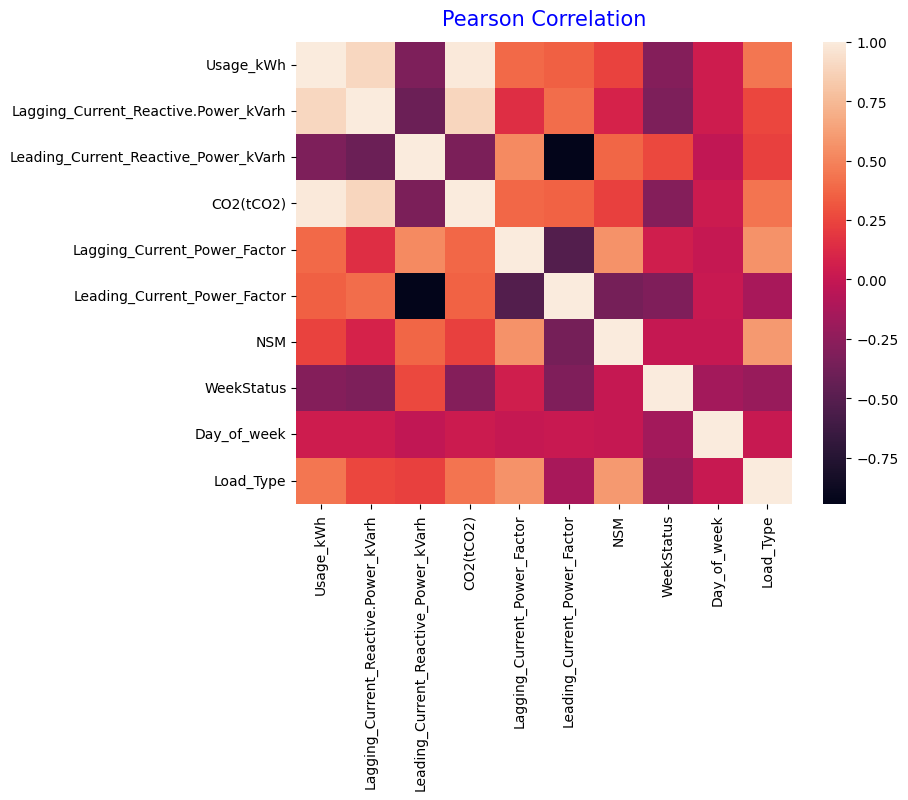

'\nThe correlation of CO² and KWH is very high and makes sense, since in practice this has a direct relationship.\n\nReactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It’s divided into “lagging” (inductive load) and “leading” (capacitive load).\n\nThese terms are related to electrical power systems.\n\nReactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It\'s divided into "lagging" (inductive load) and "leading" (capacitive load).\n\nPower Factor: This is the ratio of real power (doing actual work) to apparent power (the total power supplied). It\'s also divided into "lagging" (when current lags behind voltage) and "leading" (when current leads the voltage).\n\nIn short, these terms describe different aspects of how electrical power is used and managed in a power system.\n'

In [176]:
# We conclude then that the model that best fist to our data is the XGBoost Regression model
# Now we Analyze the correlations
df = df.drop(df.index[0:96])

#visualize the correlation using pearson correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr())
plt.title("Pearson Correlation", fontsize = 15, color = 'b', pad = 12, loc = 'center')
plt.show()

'''
The correlation of CO² and KWH is very high and makes sense, since in practice this has a direct relationship.

Reactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It’s divided into “lagging” (inductive load) and “leading” (capacitive load).

These terms are related to electrical power systems.

Reactive Power (kVarh): This is the power that oscillates back and forth, not doing any actual work but is necessary for the system to function. It's divided into "lagging" (inductive load) and "leading" (capacitive load).

Power Factor: This is the ratio of real power (doing actual work) to apparent power (the total power supplied). It's also divided into "lagging" (when current lags behind voltage) and "leading" (when current leads the voltage).

In short, these terms describe different aspects of how electrical power is used and managed in a power system.
'''


In [177]:
# Training Linear regression model and exporiting it for making inferences
# -------------------------------------------------------------------------
# -------------------------------------------------------------------------


# Load DataSet
df = pd.read_csv("/content/drive/MyDrive/Steel_industry_data.csv");

# Handling Missing And Categorical data

# Calculate the number of missing values in each column of the DataFrame
missing_value_counts = df.isna().sum()
missing_value_counts

df.dtypes

df=df.drop(['date'], axis=1)

df['WeekStatus'] = df['WeekStatus'].map({'Weekday': 0, 'Weekend': 1})
df['Day_of_week'] = df['Day_of_week'].map({'Monday': 0, 'Tuesday': 1, 'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6})
df['Load_Type'] = df['Load_Type'].map({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load':2})


# Data Preprocessing

# Splitting the DataFrame


#Independent Features
X = df.drop(['Usage_kWh'], axis=1)
#Dependent Feature/Target
y=df.Usage_kWh

# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})


Training Set - X_train shape: (24528, 9)
Testing Set - X_test shape: (10512, 9)
Training Set - y_train shape: (24528,)
Testing Set - y_test shape: (10512,)


In [180]:

#Model Evaluation

print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )


# Make prediction using random data from the dataset

Usage_Kw = lr.predict(
    [[5,0.0,0.0,61.4,100.0,14400.00,0,1,0]])


print(f"Predicted Usage_Kw : {Usage_Kw[0]}")


LinearRegression model
Sqaured mean error 4.22
R squared training 0.9785
R sqaured testing 0.9841
Predicted Usage_Kw : 3.6114701313560644


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [181]:
# Saving model in pickle file
with open("lr_model.pkl", 'wb') as file:
    pickle.dump(lr, file)
